In [13]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sahardeedahmed/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True


1. Search for a Business
2. Exit
Enter your choice: 1
Enter the name of the business: Target
Enter the zip code: 85711

Businesses found:
1. Target

Enter the number of the business to view details (0 to cancel): 1

Business Details:
Business ID: tUFrWirKiKi_TAnsVWINQQ
Name: Target
Address: 5255 E Broadway Blvd, Tucson, AZ 85711
Hours:
  Monday: 8:0-22:0
  Tuesday: 8:0-22:0
  Wednesday: 8:0-22:0
  Thursday: 8:0-22:0
  Friday: 8:0-23:0
  Saturday: 8:0-23:0
  Sunday: 8:0-22:0
Categories: Department Stores, Shopping, Fashion, Home & Garden, Electronics, Furniture Stores
Rating: Very Good
Reviews:
Review 1: We are fans of Target.  They seem to have a little better quality over Walmart.  This Target is easy to get to from the U of A.  When we have errand to run while we are over by the university we tend to stop by and pick up what we need here.

This Target happens to be one of the oldest and smallest in town.  That being said they tend to have a smaller selection.  The cafe now seems to 

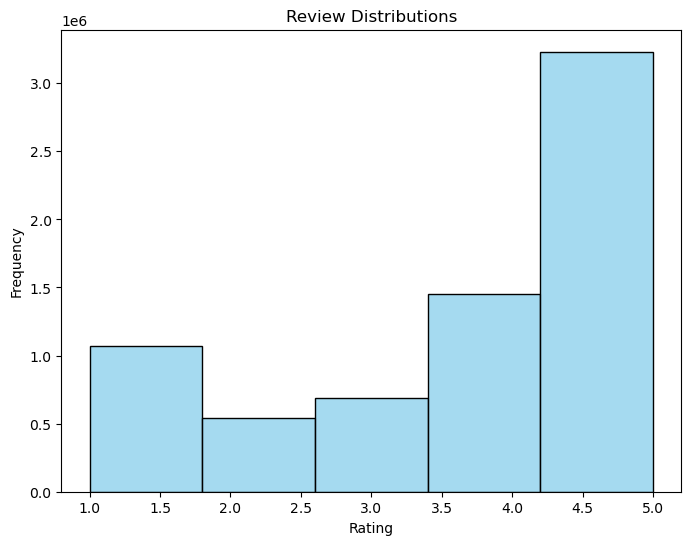


1. Search for a Business
2. Exit
Enter your choice: 2
Exiting the application...


In [14]:
import json
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Function to load the Yelp dataset from a JSON file
def load_dataset(file_path):
    dataset = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            data = json.loads(line)
            dataset.append(data)
    return dataset

# Function to search for businesses by name and zip code
def search_businesses(dataset, name, zip_code):
    businesses_found = []
    for item in dataset:
        if name.lower() in item['name'].lower() and item['postal_code'] == zip_code:
            businesses_found.append(item)
    return businesses_found

# Function to search for reviews by business ID
def search_reviews_by_business_id(reviews, business_id):
    return [review for review in reviews if review['business_id'] == business_id]

# Function to clean and preprocess review text
def clean_text(text):
    # Delete punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert to lowercase
    text = text.lower()
    # Delete numbers
    text = re.sub(r'\d+', '', text)
    # Delete unneeded whitespaces
    text = re.sub(r'\s+', ' ', text)
    return text

# Function to analyze the sentiment of reviews and determine the overall rating
def analyze_sentiment(reviews):
    analyzer = SentimentIntensityAnalyzer()
    review_scores = [analyzer.polarity_scores(clean_text(review['text']))['compound'] for review in reviews]
    avg_score = sum(review_scores) / len(review_scores)
    if avg_score < -0.6:
        rating = "Very Bad"
    elif avg_score < -0.2:
        rating = "Bad"
    elif avg_score < 0.2:
        rating = "Okay"
    elif avg_score < 0.6:
        rating = "Good"
    else:
        rating = "Very Good"
    return rating

# Function to display detailed information about a selected business
def display_business_details(business, reviews):
    business_id = business['business_id']
    name = business['name']
    address = business['address']
    city = business['city']
    state = business['state']
    postal_code = business['postal_code']
    hours = business['hours'] if 'hours' in business else None
    categories = business['categories'].split(', ') if 'categories' in business else None
    
    # Drop missing values (NaNs) from reviews
    reviews = [review for review in reviews if 'text' in review and isinstance(review['text'], str)]
    
    business_reviews = search_reviews_by_business_id(reviews, business_id)

    # Analyze sentiment of reviews
    rating = analyze_sentiment(business_reviews)

    # Display business details
    print("\nBusiness Details:")
    print(f"Business ID: {business_id}")
    print(f"Name: {name}")
    print(f"Address: {address}, {city}, {state} {postal_code}")
    if hours:
        print("Hours:")
        for day, timings in hours.items():
            print(f"  {day}: {timings}")
    if categories:
        print("Categories:", ', '.join(categories))
    print(f"Rating: {rating}")
    print("Reviews:")
    for idx, review in enumerate(business_reviews[:3]):  # Display only the first 3 reviews
        print(f"Review {idx + 1}: {review['text']}")

# Function to display the main menu options
def main_menu():
    print("\n1. Search for a Business")
    print("2. Exit")

def plot_review_ratings(reviews_data):
    # Attain ratings from dataset
    datasetRates = [review['stars'] for review in reviews_data]

    # Create Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(datasetRates, bins=5, kde=False, color='skyblue', edgecolor='black')
    plt.title('Review Distributions')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

# Main function to run the application
def main():
    # Paths to the Yelp dataset files
    businesses_file = 'yelp_academic_dataset_business.json'
    reviews_file = 'yelp_academic_dataset_review.json'

    # Load the dataset
    businesses_data = load_dataset(businesses_file)
    reviews_data = load_dataset(reviews_file)

    while True:
        main_menu()  # Display the main menu
        choice = input("Enter your choice: ")  # Prompt the user for choice

        if choice == '1':  # If the user chooses to search for a business
            business_name = input("Enter the name of the business: ")
            zip_code = input("Enter the zip code: ")

            # Search for businesses with the specified name and zip code
            businesses = search_businesses(businesses_data, business_name, zip_code)

            if not businesses:
                print("No businesses found with the specified name and zip code.")
                continue

            print("\nBusinesses found:")
            for idx, business in enumerate(businesses, start=1):
                print(f"{idx}. {business['name']}")

            selected_idx = input("\nEnter the number of the business to view details (0 to cancel): ")
            if selected_idx == '0':
                continue

            try:
                selected_idx = int(selected_idx)
                if 1 <= selected_idx <= len(businesses):
                    selected_business = businesses[selected_idx - 1]
                    display_business_details(selected_business, reviews_data)  # Display details of the selected business
                    plot_review_ratings(reviews_data)
                else:
                    print("Invalid selection. Please enter a valid number.")
            except ValueError:
                print("Invalid input. Please enter a number.")
        
        elif choice == '2':  # If the user chooses to exit
            print("Exiting the application...")
            break

        else:  # If the user enters an invalid choice
            print("Invalid choice. Please enter a valid option.")

if __name__ == "__main__":
    main()
